In [1]:
source('c:/users/tom/pycharmprojects/nyu-research/ts.R')

Warning message:
"package 'zoo' was built under R version 3.3.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'forecast' was built under R version 3.3.3"

In [2]:
preprocessing_df <- function(ts, total, thres=5000){
  
  # removes rows with low observations and locfs them
  # returns time series and total time series, as a list
  
  df = time_index(data.frame(ts))
  df_total = time_index(data.frame(total))
  
  missing = df_total[,'tweets']<thres
  print(which(missing))
  df_total[missing, 'tweets'] <- NA
  df[missing,] <-NA
  df_total = na.locf(df_total[,'tweets'])
  df_filled = (na.locf(df[, ncol(df)]))
  
  return(list(series=df_filled, total=df_total))
}

In [3]:
ts.js <- function(jcsv, scsv){
    j_tob <- read.csv(jcsv)
    pres <- j_tob[c(1,2,3)]
    tot <- j_tob[c(1,2,4)]
    new <- preprocessing_df(pres, tot)
    ts_pres <- ts((new$series)[33:(672+32)], frequency=24)
    
    s_tob <- read.csv(scsv)
    spres <-s_tob[c(1,2,3)]
    stot <- s_tob[c(1,2,4)]
    snew <- preprocessing_df(spres, stot)
    ts_spres <- ts((snew$series)[9:(672+8)], frequency=24)
    return (ts(c((new$series)[33:(672+32)], (snew$series)[9:(672+8)]), frequency=24))}

In [4]:
ts.tot <- function(jcsv, scsv){
    j_tob <- read.csv(jcsv)
    pres <- j_tob[c(1,2,3)]
    tot <- j_tob[c(1,2,4)]
    new <- preprocessing_df(pres, tot)
    ts_pres <- ts((new$total)[33:(672+32)], frequency=24)
    
    s_tob <- read.csv(scsv)
    spres <-s_tob[c(1,2,3)]
    stot <- s_tob[c(1,2,4)]
    snew <- preprocessing_df(spres, stot)
    ts_spres <- ts((snew$total)[9:(672+8)], frequency=24)
    return (ts(c((new$total)[33:(672+32)], (snew$total)[9:(672+8)]), frequency=24))}

In [5]:
ts.trends <- function(jcsv, scsv){
    j_tob <- read.csv(jcsv)
    pres <- j_tob[5]
    ts_pres <- ts((new$total)[33:(672+32)], frequency=24)
    
    s_tob <- read.csv(scsv)
    spres <-s_tob[c(1,2,3)]
    stot <- s_tob[c(1,2,4)]
    snew <- preprocessing_df(spres, stot)
    ts_spres <- ts((snew$total)[9:(672+8)], frequency=24)
    return (ts(c((new$total)[33:(672+32)], (snew$total)[9:(672+8)]), frequency=24))}

In [60]:
tob <- ts.js('c:/users/tom/documents/research/data/tob-current-june.csv', 
      'c:/users/tom/documents/research/data/tob-current-sept.csv')
alc <- ts.js('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
tot <- ts.tot('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
alc <- alc/tot
tob <- tob/tot
alc <- alc/mean(alc)
tob <- tob/mean(tob)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


In [6]:
weekify <- function(ser){
    
ser.1 = as.numeric(window(ser, start=c(1, 1), end= c(7, 24)))
ser.2 = as.numeric(window(ser, start=c(8, 1), end= c(14, 24)))
ser.3 = as.numeric(window(ser, start=c(15, 1), end= c(21, 24)))
ser.4 = as.numeric(window(ser, start=c(22, 1), end= c(28, 24)))
ser.5 = as.numeric(window(ser, start=c(29, 1), end= c(35, 24)))
ser.6 = as.numeric(window(ser, start=c(36, 1), end= c(42,24)))
ser.7 = as.numeric(window(ser, start=c(43, 1), end= c(49, 24)))
ser.8 = as.numeric(window(ser, start=c(50, 1), end= c(56, 24)))
    return (data.frame(ser.1, ser.2, ser.3, ser.4, ser.5, ser.6, ser.7, ser.8))
    }

In [82]:
alc.df <- weekify(alc)
tob.df <- weekify(tob)
alc.trends <- weekify(trends_alc)

In [8]:
plot_series <- function(tob.df, cur.df, plot_max = 3){
    #     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
        week_names = c('J1', 'J2', 'J3', 'J4', 'S1', 'S2','S3', 'S4')
    par(mfrow=c(8,1))
    # outer margin
    par(oma = c(5, 3, 5, 0))
    for (col in 1:8){
        # remove space for x-axis
        par(mar = c(0, 8, 0, 0))
        yrange = c(0, plot_max)
        plot(tob.df[, col], type='l', xaxt='n', col='blue', ylim=yrange, yaxt='n', ylab='')
        lines(cur.df[,col], col='red')
        # lines(shi.df[,col], col='steelblue')
        title(cex.lab =3, ylab=week_names[col], line=6)
        axis(2, at=c(0, plot_max /3, 2*plot_max /3), las = 1, cex.axis=2)
        abline(v=seq(1, 168, by=24), lty=2)

    
    mtext('Proportion of 8 Week Mean', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 8am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)
    }
    par(xpd=NA)
    
}

# Shisha 8 Week with CCF

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


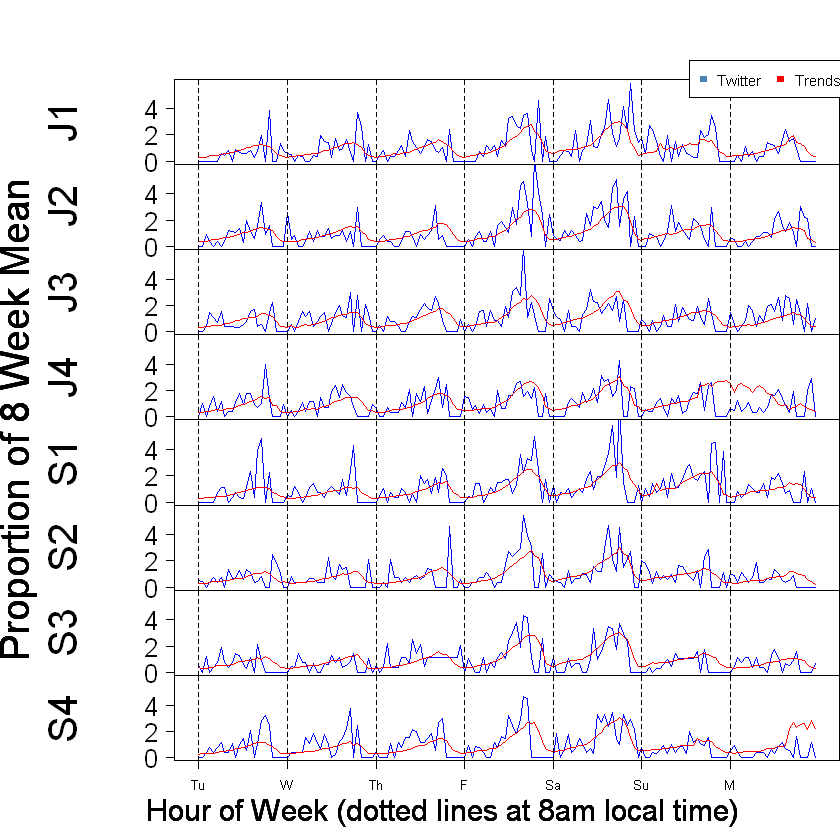

In [9]:
shi <- ts.js('c:/users/tom/documents/research/data/shisha-june.csv', 
      'c:/users/tom/documents/research/data/shisha-sept.csv')
tot <- ts.tot('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
shi <- shi/tot
shi <- shi/mean(shi)
shi.df <- weekify(shi)
trends_shi.j <- read.csv('c:/users/tom/documents/research/data/June2015_Trends_hookah.csv')
trends_shi.s <- read.csv('c:/users/tom/documents/research/data/Sept2015_Trends_hookah.csv')
trends_shi <- ts(c(trends_shi.j[33:(672+32), 4], trends_shi.s[9:(672+8), 4]), frequency=24)
trends_shi <- trends_shi/mean(trends_shi)
shi.trends <- weekify(trends_shi)

#pdf('c:/users/tom/documents/research/trends_plots/hookah.pdf',width=7,height=12,paper='special') 
plot_series(shi.df, shi.trends,  plot_max = 6)
legend(134,53,inset = 0,
        legend = c("Twitter", "Trends"), 
        col=c("steelblue", "red" ), pch=15, cex=1.1, horiz=TRUE)
#dev.off()

[1] "week"
[1] 1

Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.364  0.360  0.349  0.271  0.174  0.076 -0.023 -0.082 -0.110 -0.156 -0.165 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.197 -0.195 -0.165 -0.103 -0.065  0.000  0.059  0.146  0.231  0.308  0.401 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.442  0.522  0.558  0.549  0.511  0.415  0.331  0.220  0.142  0.081  0.010 
     9     10     11     12     13     14     15     16     17     18     19 
-0.043 -0.097 -0.114 -0.133 -0.131 -0.110 -0.093 -0.075 -0.031  0.035  0.097 
    20     21     22     23     24 
 0.179  0.247  0.307  0.364  0.402 
[1] "week"
[1] 2


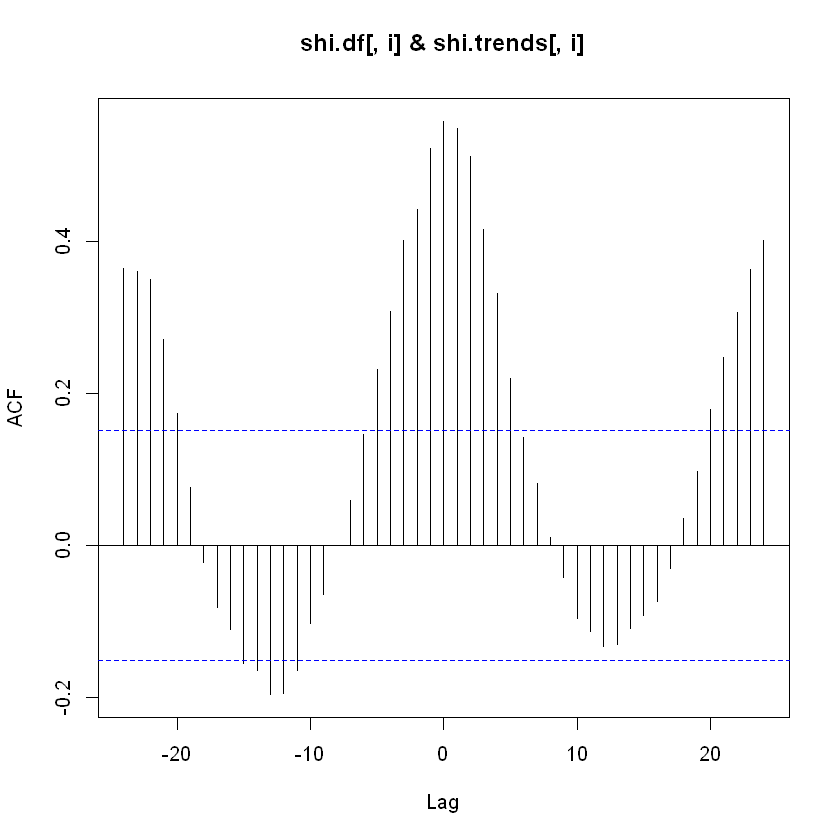


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.473  0.422  0.352  0.268  0.184  0.099  0.025 -0.037 -0.102 -0.152 -0.198 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.211 -0.198 -0.159 -0.115 -0.053  0.017  0.086  0.181  0.310  0.428  0.511 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.577  0.647  0.667  0.612  0.507  0.402  0.277  0.156  0.058 -0.033 -0.128 
     9     10     11     12     13     14     15     16     17     18     19 
-0.184 -0.228 -0.243 -0.226 -0.191 -0.151 -0.103 -0.041  0.026  0.113  0.199 
    20     21     22     23     24 
 0.280  0.337  0.382  0.414  0.410 
[1] "week"
[1] 3


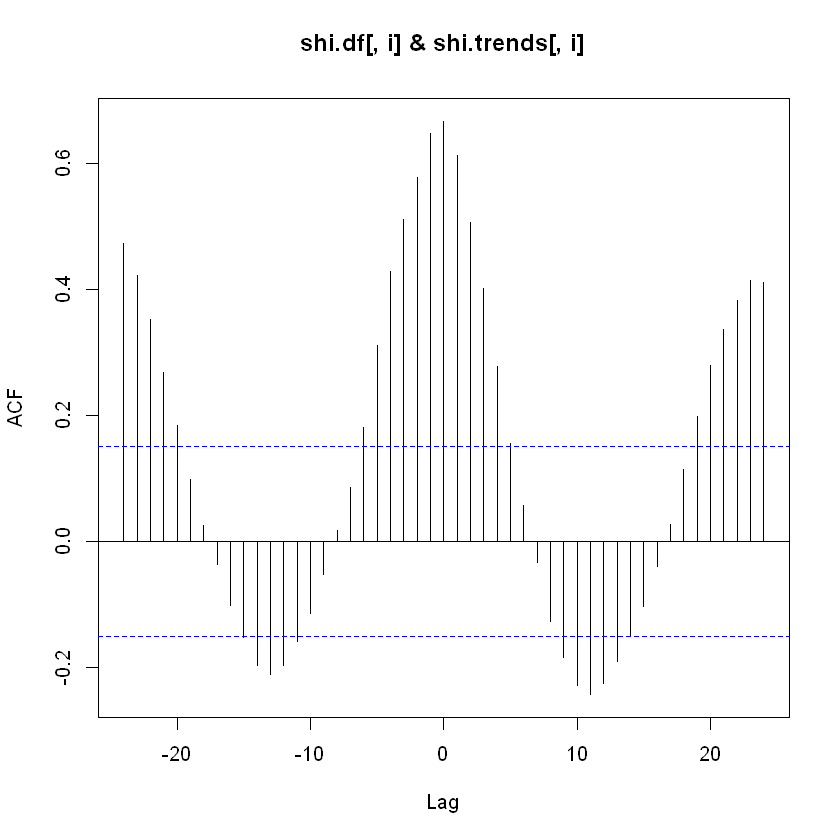


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.409  0.322  0.213  0.118  0.025 -0.052 -0.123 -0.162 -0.182 -0.191 -0.193 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.206 -0.209 -0.176 -0.143 -0.066  0.017  0.115  0.249  0.375  0.472  0.540 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.555  0.517  0.440  0.314  0.204  0.088 -0.011 -0.089 -0.175 -0.217 -0.247 
     9     10     11     12     13     14     15     16     17     18     19 
-0.270 -0.277 -0.302 -0.286 -0.253 -0.193 -0.117 -0.024  0.061  0.167  0.258 
    20     21     22     23     24 
 0.359  0.429  0.446  0.395  0.304 
[1] "week"
[1] 4


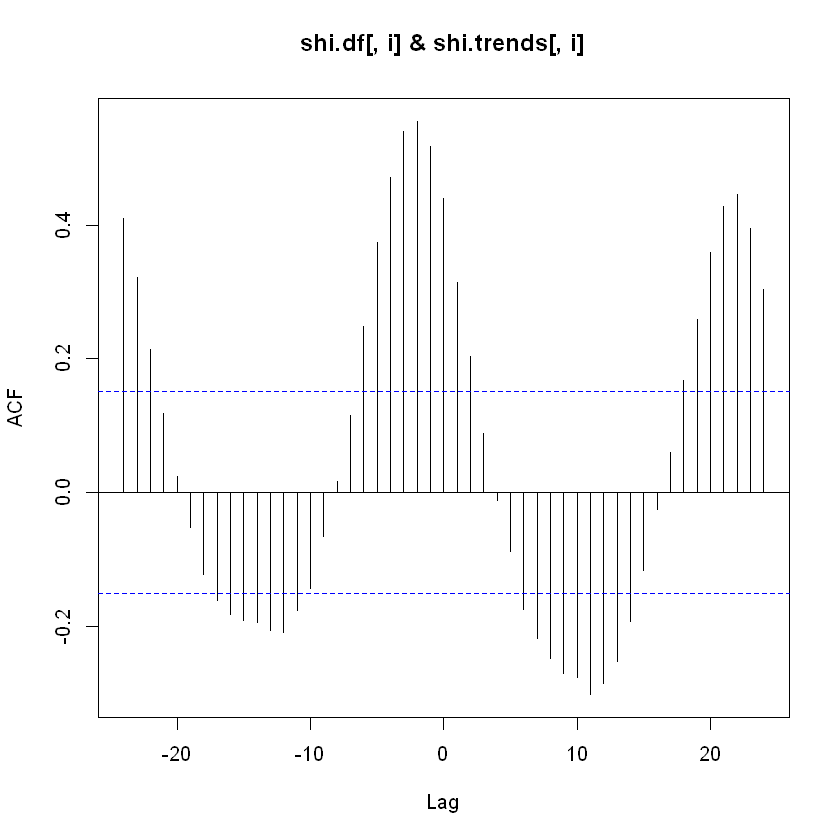


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.288  0.221  0.115  0.002 -0.028 -0.079 -0.126 -0.167 -0.187 -0.194 -0.190 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.176 -0.188 -0.176 -0.134 -0.094  0.015  0.093  0.167  0.265  0.339  0.409 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.410  0.369  0.332  0.243  0.176  0.066 -0.033 -0.117 -0.185 -0.228 -0.247 
     9     10     11     12     13     14     15     16     17     18     19 
-0.264 -0.275 -0.269 -0.221 -0.183 -0.131 -0.102 -0.037  0.053  0.150  0.266 
    20     21     22     23     24 
 0.327  0.374  0.413  0.374  0.328 
[1] "week"
[1] 5


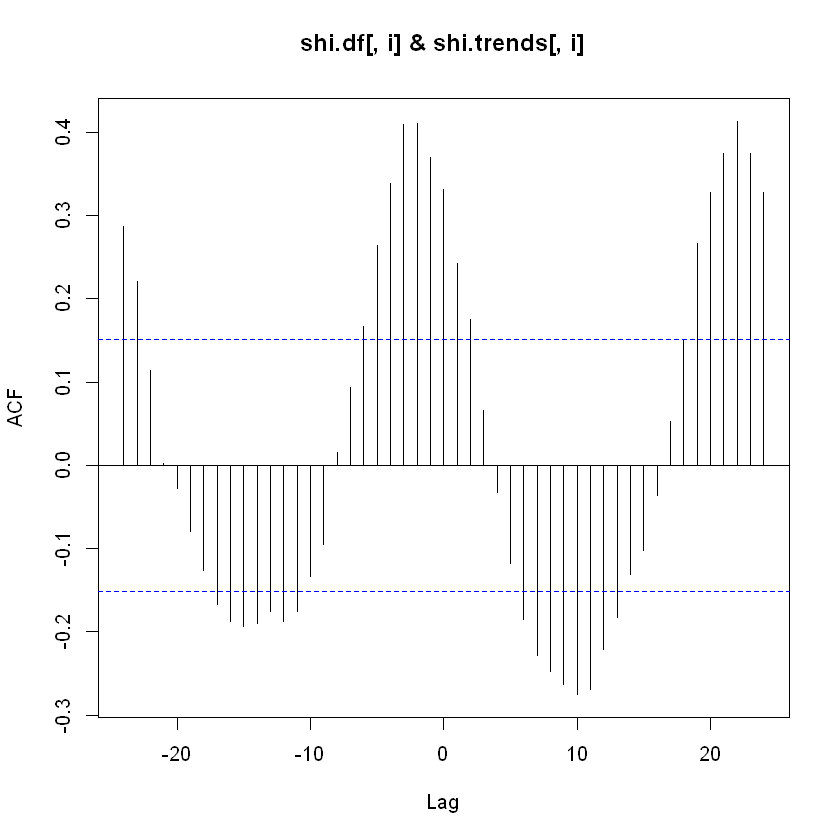


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.496  0.450  0.370  0.281  0.180  0.079  0.016 -0.073 -0.122 -0.158 -0.173 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.162 -0.153 -0.166 -0.124 -0.118 -0.062  0.030  0.122  0.242  0.370  0.459 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.560  0.609  0.612  0.554  0.457  0.335  0.221  0.106  0.027 -0.028 -0.090 
     9     10     11     12     13     14     15     16     17     18     19 
-0.126 -0.166 -0.185 -0.177 -0.170 -0.141 -0.071 -0.016  0.038  0.151  0.198 
    20     21     22     23     24 
 0.287  0.364  0.414  0.454  0.446 
[1] "week"
[1] 6


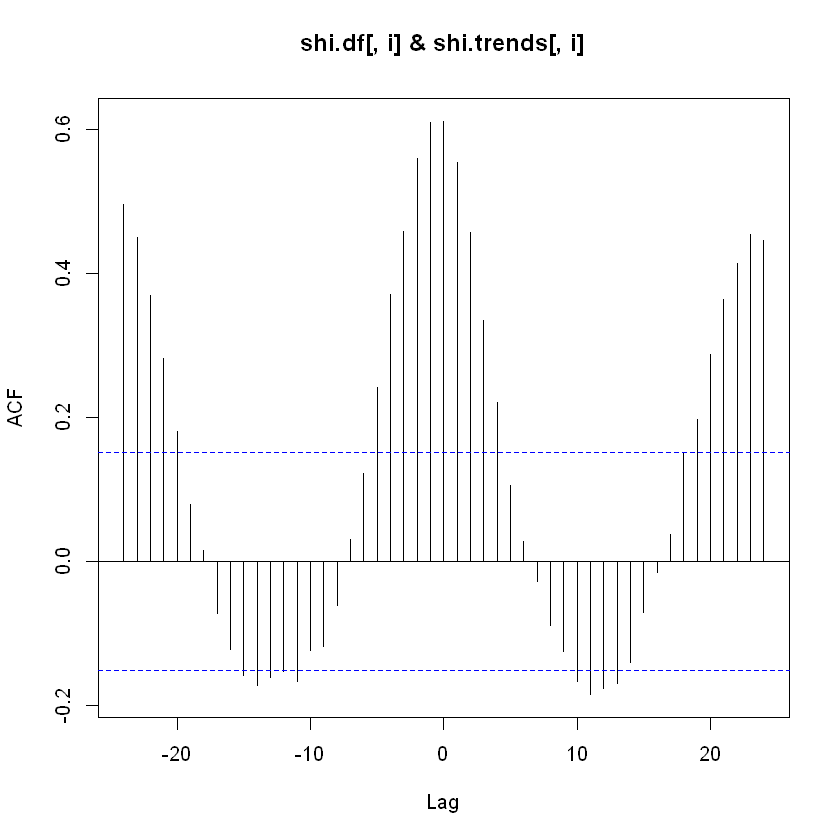


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.352  0.314  0.272  0.205  0.122  0.067 -0.005 -0.052 -0.085 -0.106 -0.110 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.127 -0.140 -0.164 -0.145 -0.093 -0.030  0.069  0.192  0.315  0.430  0.525 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.553  0.549  0.547  0.484  0.418  0.337  0.241  0.163  0.097  0.038 -0.015 
     9     10     11     12     13     14     15     16     17     18     19 
-0.053 -0.070 -0.096 -0.106 -0.114 -0.100 -0.074 -0.030  0.024  0.113  0.194 
    20     21     22     23     24 
 0.269  0.362  0.387  0.374  0.362 
[1] "week"
[1] 7


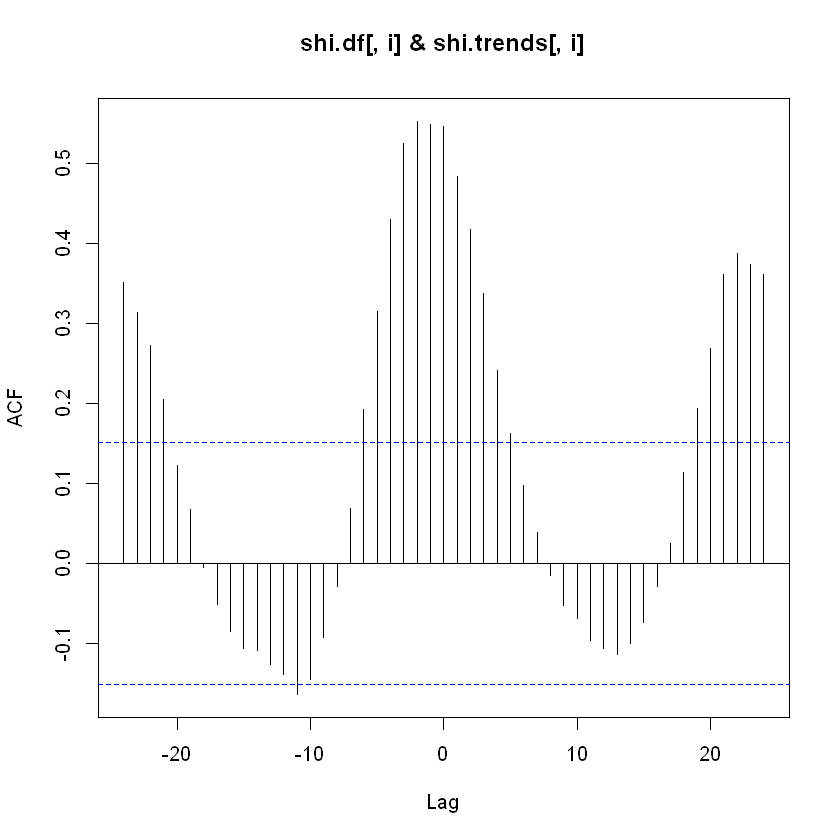


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.434  0.383  0.309  0.226  0.132  0.048 -0.026 -0.080 -0.116 -0.158 -0.170 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.197 -0.205 -0.197 -0.145 -0.058  0.029  0.160  0.268  0.400  0.515  0.616 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.662  0.643  0.589  0.500  0.381  0.268  0.149  0.037 -0.052 -0.123 -0.167 
     9     10     11     12     13     14     15     16     17     18     19 
-0.208 -0.238 -0.248 -0.247 -0.227 -0.179 -0.103 -0.039  0.058  0.151  0.241 
    20     21     22     23     24 
 0.318  0.384  0.417  0.413  0.355 
[1] "week"
[1] 8


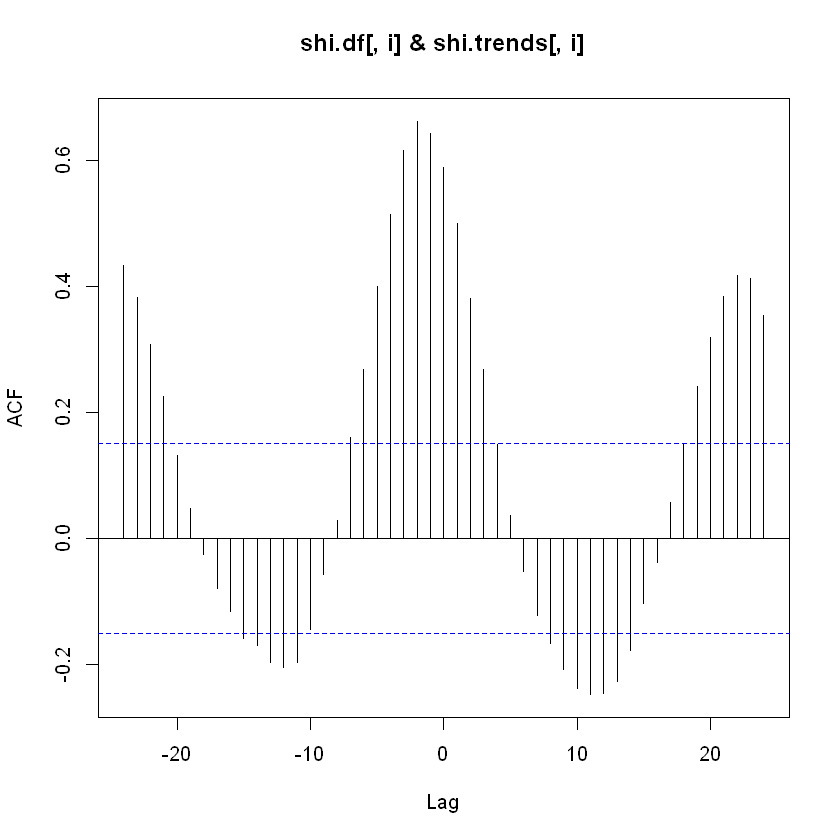


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.283  0.198  0.101 -0.007 -0.089 -0.161 -0.216 -0.260 -0.278 -0.286 -0.296 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.293 -0.271 -0.239 -0.200 -0.123 -0.041  0.056  0.155  0.274  0.383  0.451 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.487  0.475  0.445  0.360  0.289  0.170  0.080  0.011 -0.057 -0.110 -0.140 
     9     10     11     12     13     14     15     16     17     18     19 
-0.174 -0.192 -0.204 -0.201 -0.188 -0.171 -0.133 -0.080 -0.002  0.093  0.189 
    20     21     22     23     24 
 0.270  0.324  0.342  0.336  0.290 


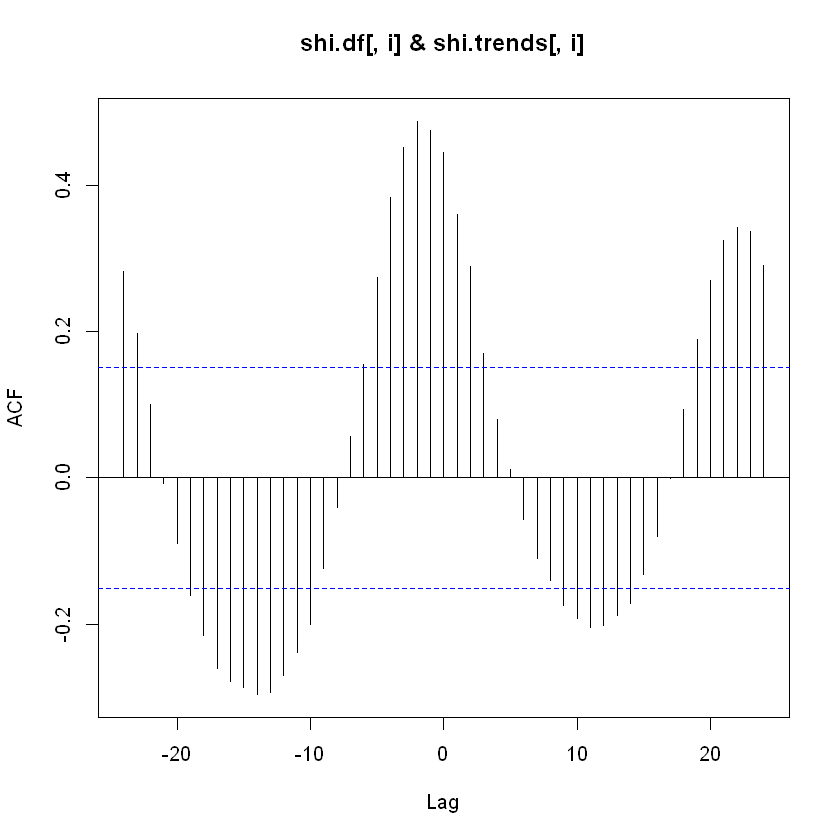

In [14]:
for (i in 1:8){
    print('week')
    print(i)
    print(ccf(shi.df[,i], shi.trends[,i], lag.max=24))
}

# Shisha AVG with CCF

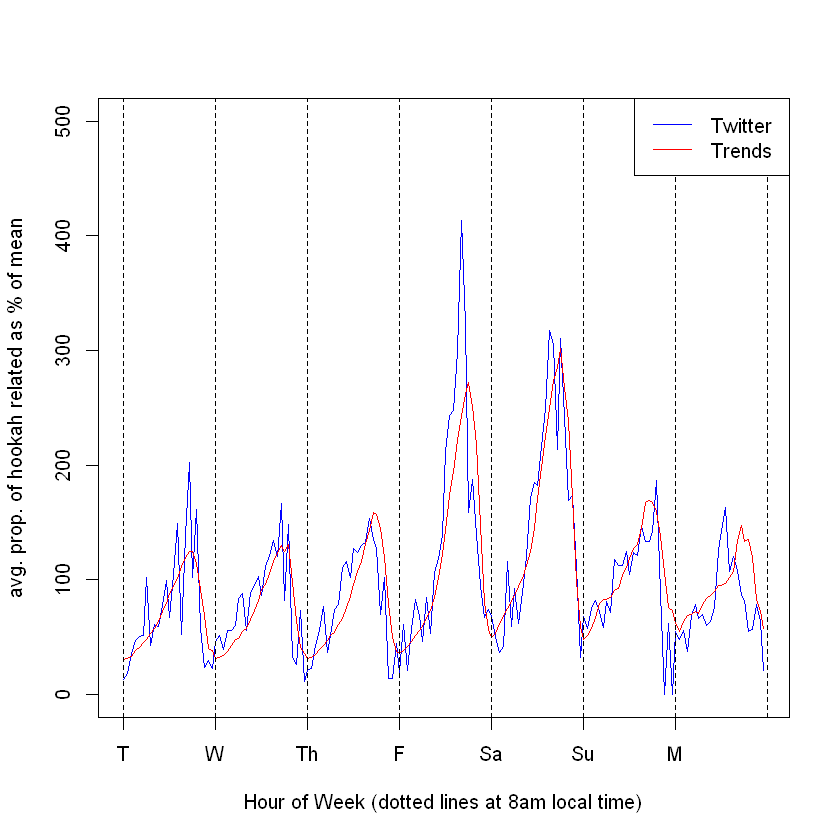

In [21]:
# pdf('c:/users/tom/documents/research/trends_plots_week/hookah.pdf',width=7,height=4,paper='special') 
tw.week.avg <- apply(shi.df, FUN=mean, MARGIN=1) * 100
trend.week.avg <- apply(shi.trends, FUN=mean, MARGIN=1) * 100
plot.ts(tw.week.avg, xaxt='n', col="blue", ylim=c(0,500), ylab="avg. prop. of hookah related as % of mean",
        xlab='Hour of Week (dotted lines at 8am local time)')
lines(trend.week.avg, col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('T', 'W', 'Th', 'F', 'Sa', 'Su', 'M'))
abline(v=seq(1, 168+24, by=24), lty=2)
legend("topright", c('Twitter',  'Trends'), bg='white', col=c('blue', 'red'),
      cex = 1,  lty = c(1, 1))
# dev.off()


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.655  0.557  0.437  0.292  0.145  0.015 -0.099 -0.180 -0.240 -0.283 -0.309 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.322 -0.315 -0.286 -0.226 -0.138 -0.022  0.121  0.287  0.468  0.643  0.774 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.862  0.883  0.845  0.733  0.584  0.419  0.250  0.098 -0.033 -0.132 -0.212 
     9     10     11     12     13     14     15     16     17     18     19 
-0.274 -0.317 -0.338 -0.329 -0.304 -0.248 -0.170 -0.080  0.039  0.181  0.322 
    20     21     22     23     24 
 0.459  0.564  0.627  0.636  0.586 


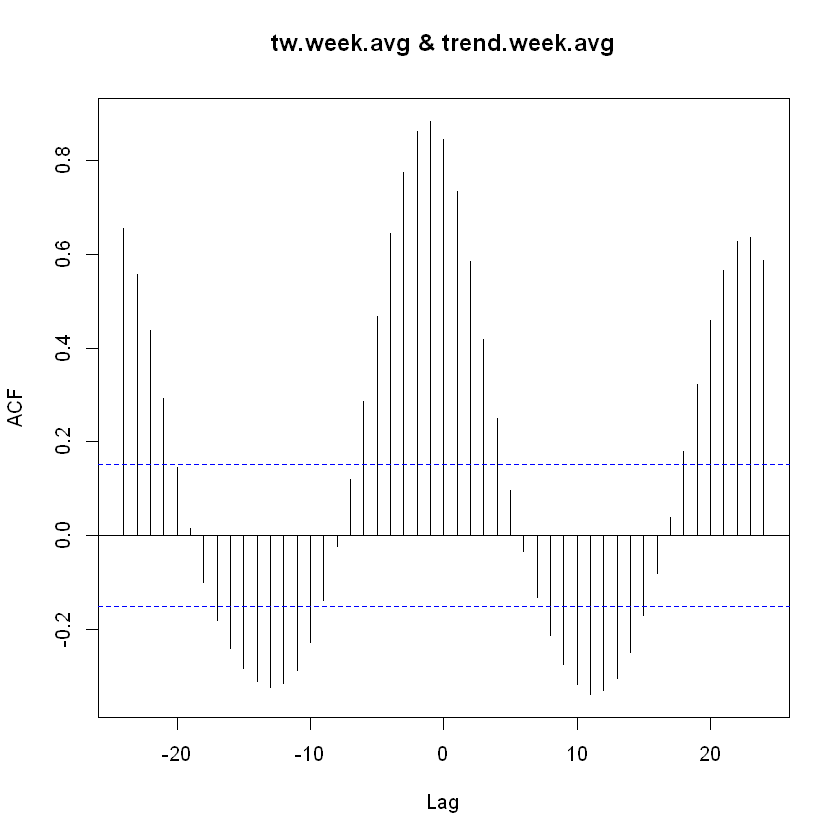

In [22]:
print(ccf(tw.week.avg, trend.week.avg, lag.max=24))

# Alc 8 Week with CCF

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


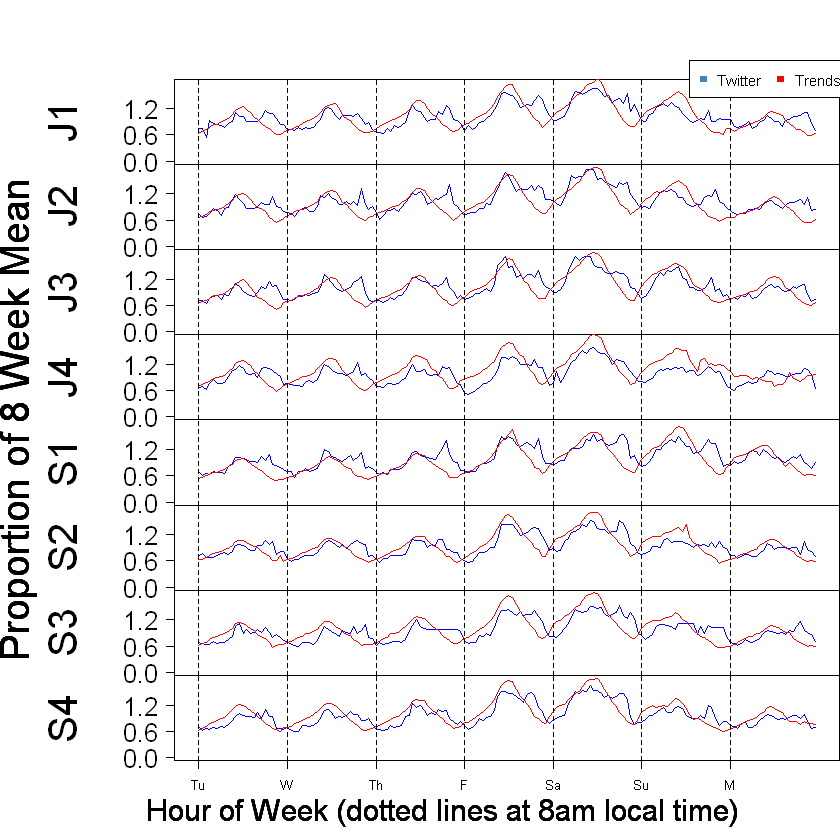

In [16]:
alc <- ts.js('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
tot <- ts.tot('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
alc <- alc/tot
alc <- alc/mean(alc)
alc.df <- weekify(alc)

trends_alc.j <- read.csv('c:/users/tom/documents/research/data/June2015_Trends_alcohol.csv')
trends_alc.s <- read.csv('c:/users/tom/documents/research/data/Sept2015_Trends_alcohol.csv')
trends_alc <- ts(c(trends_alc.j[33:(672+32), 5], trends_alc.s[9:(672+8), 5]), frequency=24)
trends_alc <- trends_alc/mean(trends_alc)
alc.trends <- weekify(trends_alc)
#pdf('c:/users/tom/documents/research/trends_plots/alc.pdf',width=7,height=12,paper='special') 
plot_series(alc.df, alc.trends,  plot_max = 1.8)
legend(134,15.9,inset = 0,
        legend = c("Twitter", "Trends"), 
        col=c("steelblue", "red" ), pch=15, cex=1.1, horiz=TRUE)
#dev.off()

[1] "week"
[1] 1

Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.357  0.420  0.476  0.523  0.553  0.561  0.539  0.496  0.426  0.332  0.222 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
 0.104  0.001 -0.066 -0.092 -0.068 -0.010  0.070  0.162  0.257  0.353  0.451 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.537  0.615  0.681  0.706  0.710  0.695  0.681  0.654  0.605  0.527  0.429 
     9     10     11     12     13     14     15     16     17     18     19 
 0.312  0.193  0.086 -0.005 -0.062 -0.084 -0.069 -0.028  0.027  0.087  0.156 
    20     21     22     23     24 
 0.223  0.285  0.334  0.361  0.380 
[1] "week"
[1] 2


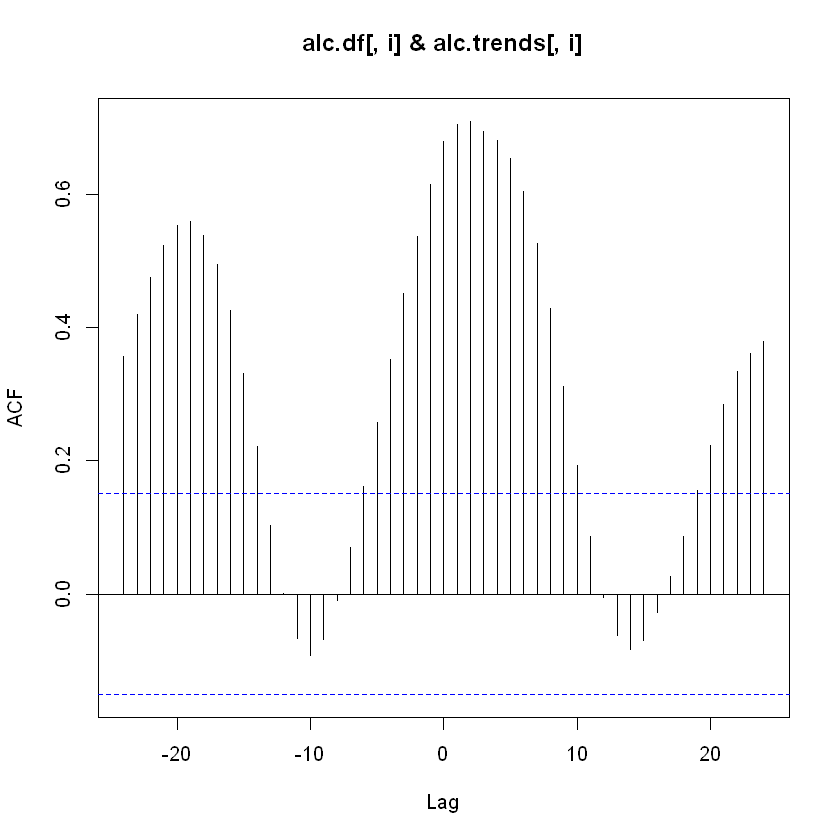


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.376  0.443  0.498  0.542  0.571  0.577  0.555  0.508  0.431  0.333  0.212 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
 0.083 -0.033 -0.111 -0.137 -0.105 -0.036  0.050  0.147  0.248  0.351  0.446 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.527  0.596  0.658  0.679  0.683  0.674  0.656  0.626  0.572  0.498  0.399 
     9     10     11     12     13     14     15     16     17     18     19 
 0.282  0.164  0.050 -0.049 -0.115 -0.141 -0.126 -0.081 -0.023  0.040  0.103 
    20     21     22     23     24 
 0.161  0.217  0.262  0.292  0.316 
[1] "week"
[1] 3


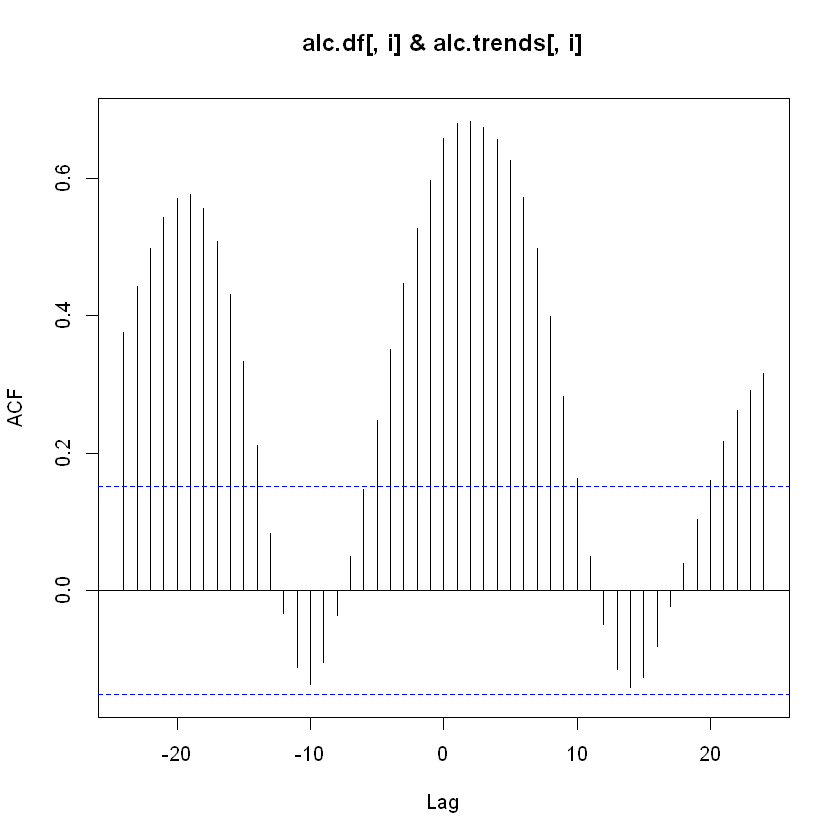


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.477  0.537  0.579  0.601  0.605  0.586  0.539  0.467  0.371  0.255  0.129 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
 0.003 -0.105 -0.172 -0.183 -0.149 -0.071  0.026  0.133  0.243  0.358  0.466 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.565  0.654  0.722  0.746  0.745  0.722  0.681  0.621  0.543  0.439  0.311 
     9     10     11     12     13     14     15     16     17     18     19 
 0.170  0.035 -0.079 -0.169 -0.212 -0.211 -0.170 -0.104 -0.023  0.061  0.138 
    20     21     22     23     24 
 0.216  0.284  0.342  0.383  0.407 
[1] "week"
[1] 4


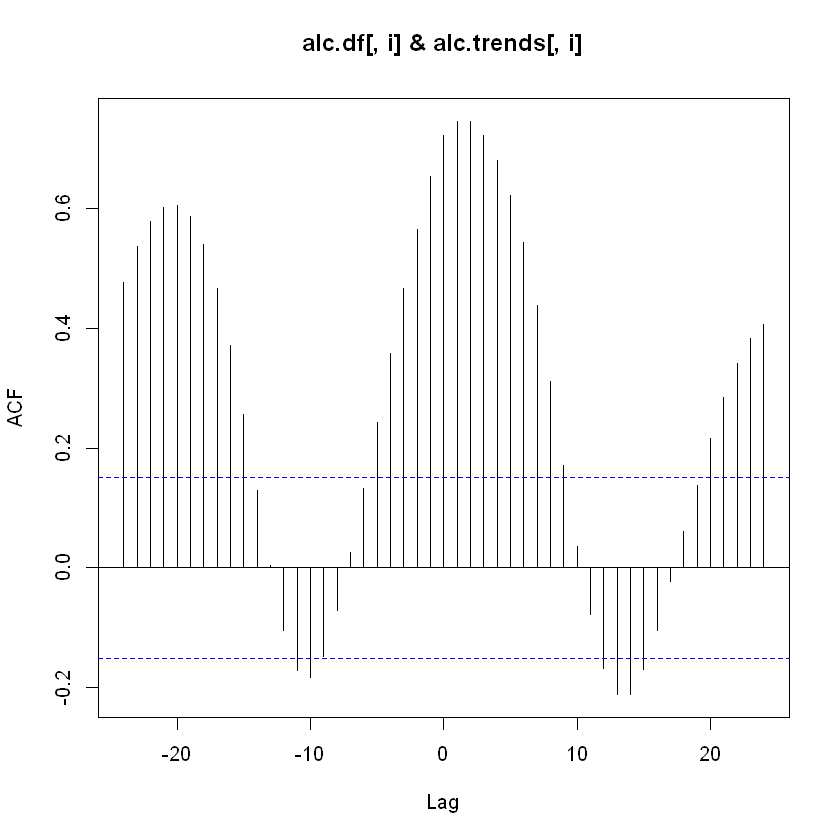


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.383  0.469  0.534  0.573  0.589  0.590  0.548  0.483  0.390  0.270  0.132 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.011 -0.141 -0.243 -0.297 -0.295 -0.244 -0.160 -0.046  0.077  0.196  0.323 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.434  0.536  0.630  0.678  0.701  0.692  0.669  0.622  0.546  0.431  0.309 
     9     10     11     12     13     14     15     16     17     18     19 
 0.174  0.023 -0.119 -0.239 -0.325 -0.367 -0.361 -0.317 -0.248 -0.155 -0.057 
    20     21     22     23     24 
 0.048  0.148  0.243  0.326  0.390 
[1] "week"
[1] 5


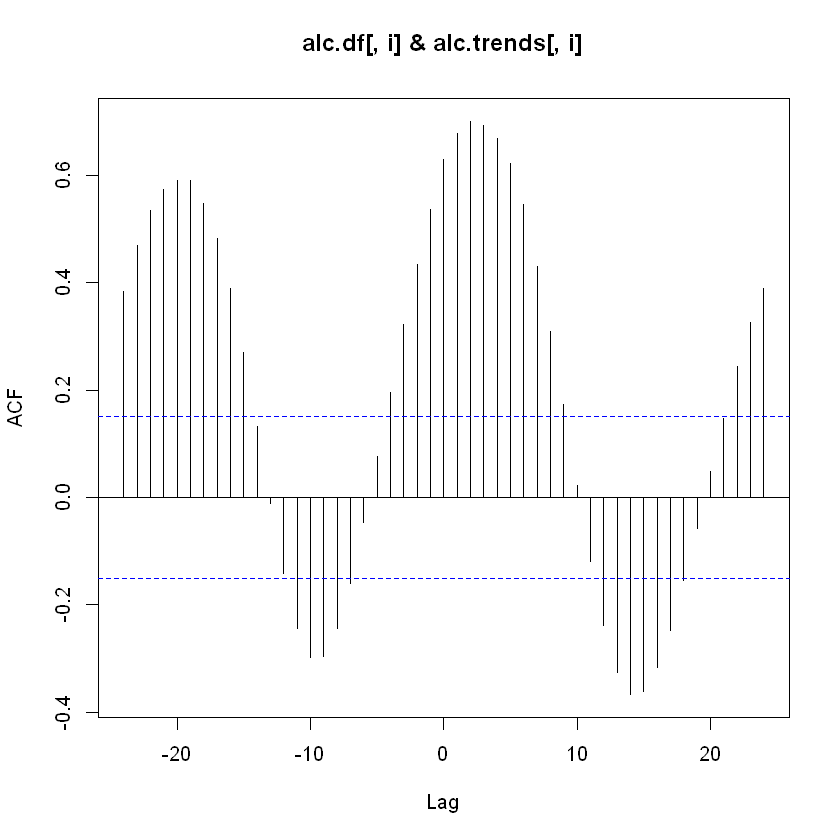


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.494  0.598  0.672  0.719  0.744  0.741  0.709  0.642  0.548  0.432  0.291 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
 0.147  0.018 -0.076 -0.127 -0.124 -0.081 -0.013  0.066  0.155  0.253  0.361 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.472  0.590  0.690  0.745  0.770  0.774  0.754  0.715  0.656  0.571  0.448 
     9     10     11     12     13     14     15     16     17     18     19 
 0.313  0.174  0.046 -0.057 -0.123 -0.147 -0.128 -0.081 -0.016  0.057  0.127 
    20     21     22     23     24 
 0.201  0.273  0.346  0.413  0.466 
[1] "week"
[1] 6


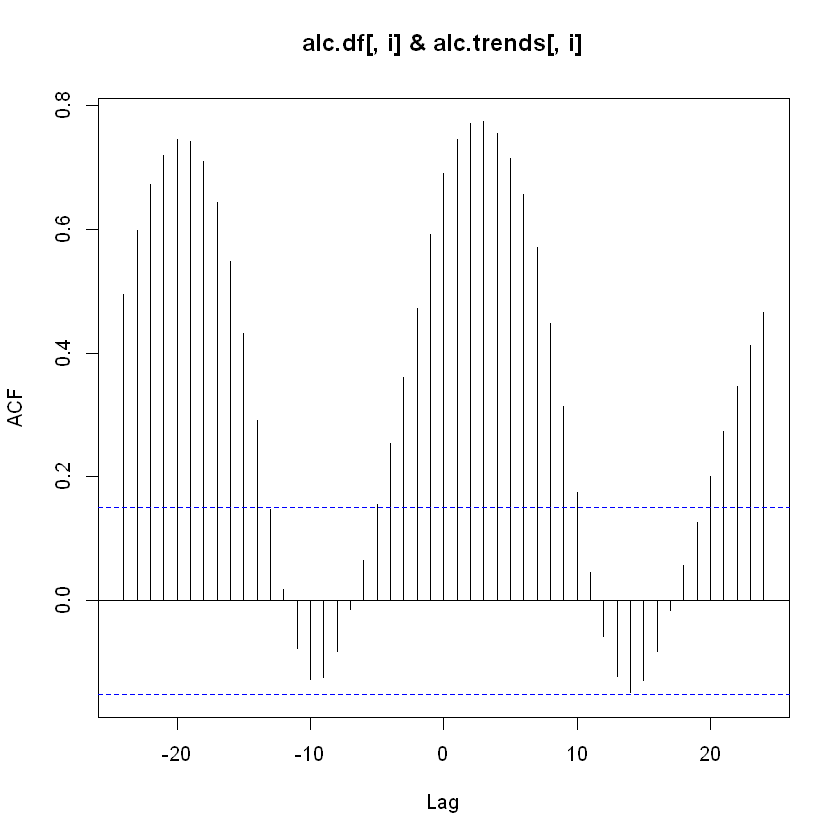


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.398  0.499  0.573  0.627  0.653  0.649  0.624  0.567  0.480  0.369  0.242 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
 0.103 -0.017 -0.104 -0.148 -0.142 -0.102 -0.037  0.048  0.136  0.235  0.339 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.461  0.578  0.689  0.758  0.795  0.804  0.789  0.748  0.684  0.596  0.477 
     9     10     11     12     13     14     15     16     17     18     19 
 0.343  0.196  0.060 -0.053 -0.128 -0.164 -0.165 -0.136 -0.082 -0.024  0.041 
    20     21     22     23     24 
 0.107  0.181  0.255  0.323  0.376 
[1] "week"
[1] 7


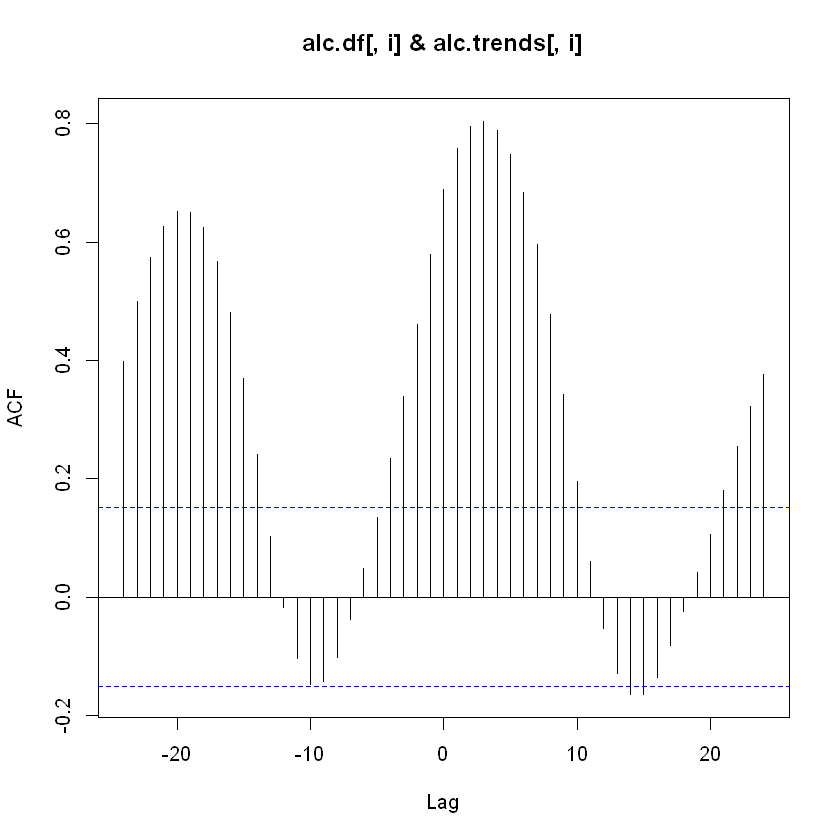


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.291  0.394  0.477  0.543  0.587  0.601  0.591  0.556  0.497  0.416  0.308 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
 0.189  0.070 -0.030 -0.093 -0.106 -0.079 -0.024  0.049  0.129  0.215  0.323 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.435  0.550  0.660  0.733  0.784  0.811  0.814  0.791  0.741  0.663  0.564 
     9     10     11     12     13     14     15     16     17     18     19 
 0.451  0.326  0.207  0.098  0.005 -0.053 -0.070 -0.054 -0.013  0.035  0.086 
    20     21     22     23     24 
 0.140  0.198  0.262  0.326  0.382 
[1] "week"
[1] 8


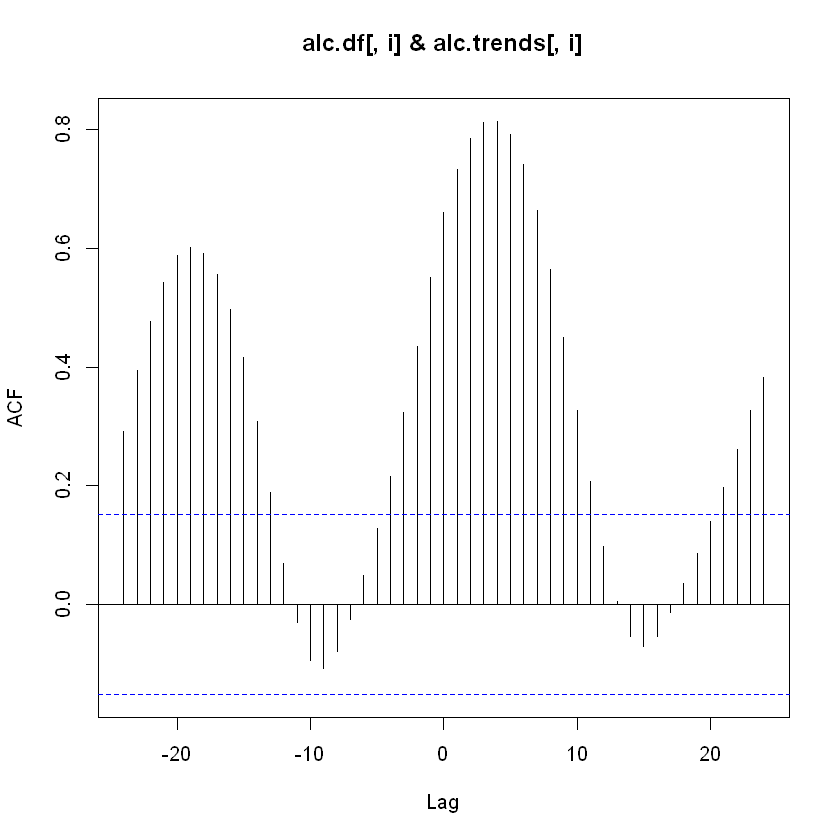


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.404  0.486  0.540  0.576  0.589  0.576  0.535  0.471  0.380  0.268  0.144 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
 0.020 -0.082 -0.147 -0.169 -0.154 -0.102 -0.022  0.068  0.170  0.283  0.406 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.537  0.669  0.771  0.825  0.840  0.831  0.795  0.740  0.660  0.550  0.413 
     9     10     11     12     13     14     15     16     17     18     19 
 0.268  0.127  0.004 -0.084 -0.132 -0.145 -0.122 -0.074 -0.007  0.062  0.140 
    20     21     22     23     24 
 0.213  0.293  0.367  0.436  0.482 


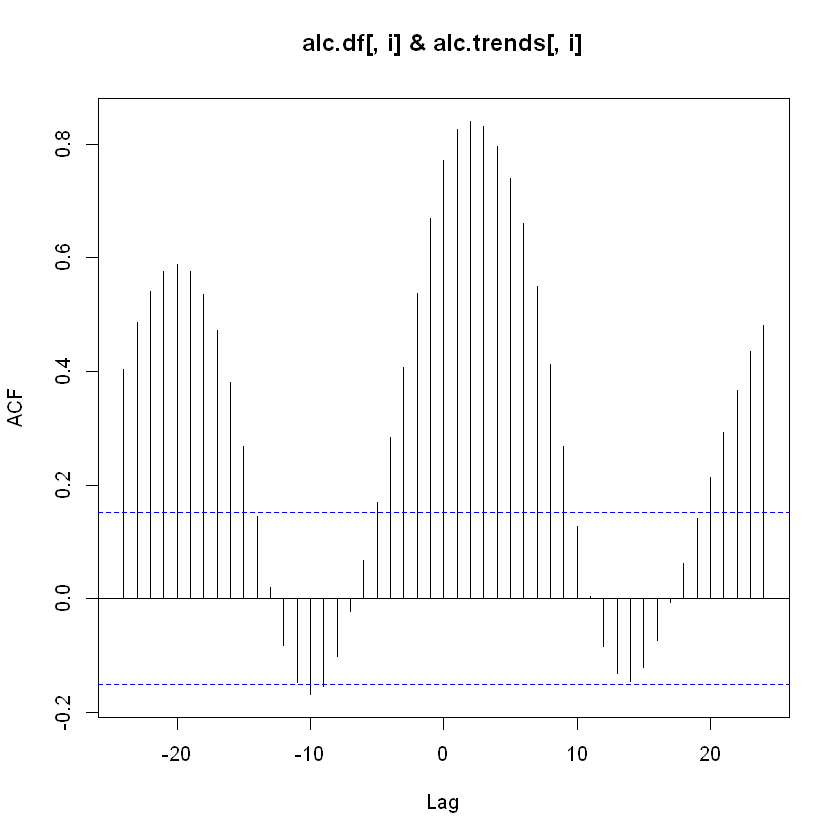

In [17]:
for (i in 1:8){
    print('week')
    print(i)
    print(ccf(alc.df[,i], alc.trends[,i], lag.max=24))
}

# Alc AVG with CCF

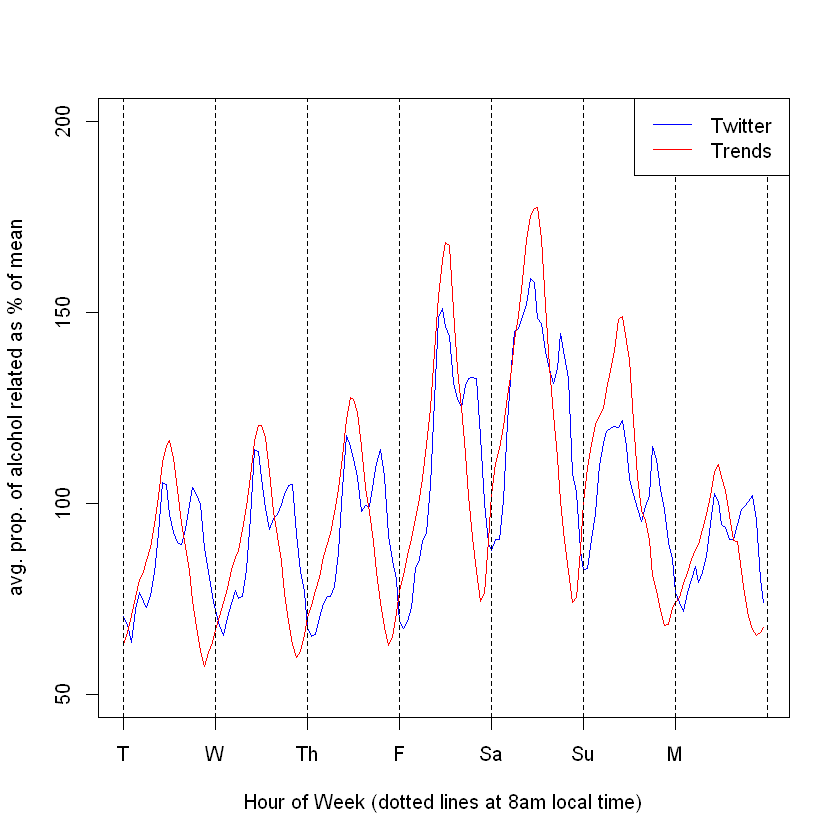

In [18]:
#pdf('c:/users/tom/documents/research/trends_plots_week/alc.pdf',width=7,height=4,paper='special') 
tw.week.avg <- apply(alc.df, FUN=mean, MARGIN=1) * 100
trend.week.avg <- apply(alc.trends, FUN=mean, MARGIN=1) * 100
plot.ts(tw.week.avg, xaxt='n', col="blue", ylim=c(50,200), ylab="avg. prop. of alcohol related as % of mean",
        xlab='Hour of Week (dotted lines at 8am local time)')
lines(trend.week.avg, col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('T', 'W', 'Th', 'F', 'Sa', 'Su', 'M'))
abline(v=seq(1, 168+24, by=24), lty=2)
legend("topright", c('Twitter',  'Trends'), bg='white', col=c('blue', 'red'),
      cex = 1,  lty = c(1, 1))
# dev.off()


Autocorrelations of series 'X', by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
 0.435  0.525  0.592  0.639  0.662  0.659  0.626  0.563  0.470  0.354  0.220 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
 0.078 -0.049 -0.140 -0.181 -0.169 -0.114 -0.031  0.067  0.172  0.284  0.401 
    -2     -1      0      1      2      3      4      5      6      7      8 
 0.517  0.629  0.725  0.776  0.800  0.797  0.776  0.735  0.666  0.567  0.444 
     9     10     11     12     13     14     15     16     17     18     19 
 0.304  0.161  0.029 -0.080 -0.153 -0.183 -0.170 -0.125 -0.060  0.014  0.092 
    20     21     22     23     24 
 0.169  0.248  0.319  0.382  0.428 


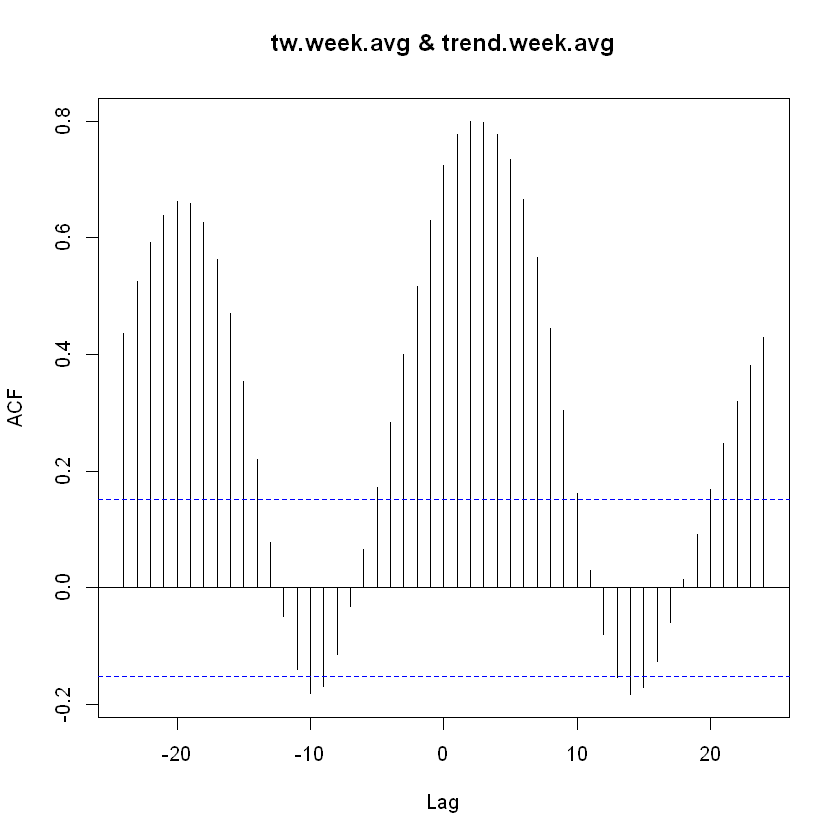

In [20]:
print(ccf(tw.week.avg, trend.week.avg, lag.max=24))


In [23]:
library('TSclust')
library('factoextra')

Warning message:
"package 'TSclust' was built under R version 3.3.3"Loading required package: wmtsa
Warning message:
"package 'wmtsa' was built under R version 3.3.3"Loading required package: pdc
Warning message:
"package 'pdc' was built under R version 3.3.3"Loading required package: cluster
Warning message:
"package 'factoextra' was built under R version 3.3.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [31]:
weeks = cbind(alc.df, tob.df)
head(weeks)

ser.1,ser.2,ser.3,ser.4,ser.5,ser.6,ser.7,ser.8,ser.1,ser.2,ser.3,ser.4,ser.5,ser.6,ser.7,ser.8
0.08872132,0.5385177,0.5055052,0.4394800,0.6519985,0.6148593,0.6107328,0.6519985,0.06968063,0.4529241,0.3484032,0.5574450,1.0103691,0.6619660,0.8013273,0.9406885
0.09903775,0.5818468,0.6602516,0.6189859,0.6870744,0.8335677,0.7200870,0.6664415,0.10452095,0.8710079,0.7316466,0.6271257,0.7664869,0.8710079,0.8013273,0.7664869
0.08253146,0.7262768,0.7221502,0.6478719,0.7799223,0.7943653,0.7365932,0.7778590,0.06968063,1.1148901,0.7316466,0.8710079,0.7664869,1.0800498,1.1497304,1.1497304
0.18156920,0.8789600,0.9573649,0.9078460,0.8026184,0.8459474,0.7696058,0.7923020,0.03484032,1.1148901,0.9406885,1.3239320,1.0800498,1.2542513,0.8013273,0.9406885
0.37551812,1.0502128,1.0646558,1.0275166,0.8830866,0.8521373,0.8562639,0.8521373,0.00000000,1.2194110,1.2194110,1.1497304,1.1497304,1.0452095,1.0800498,0.8013273
0.41472057,0.9965673,1.0605292,0.9243523,0.8315044,0.9140359,0.8005551,0.8273778,0.24388221,1.4284529,1.0103691,1.3239320,1.4284529,1.1148901,0.6619660,0.8013273


In [38]:
library(dendextend)

Warning message:
"package 'dendextend' was built under R version 3.3.3"
---------------------
Welcome to dendextend version 1.5.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



png 
  2

png 
  2

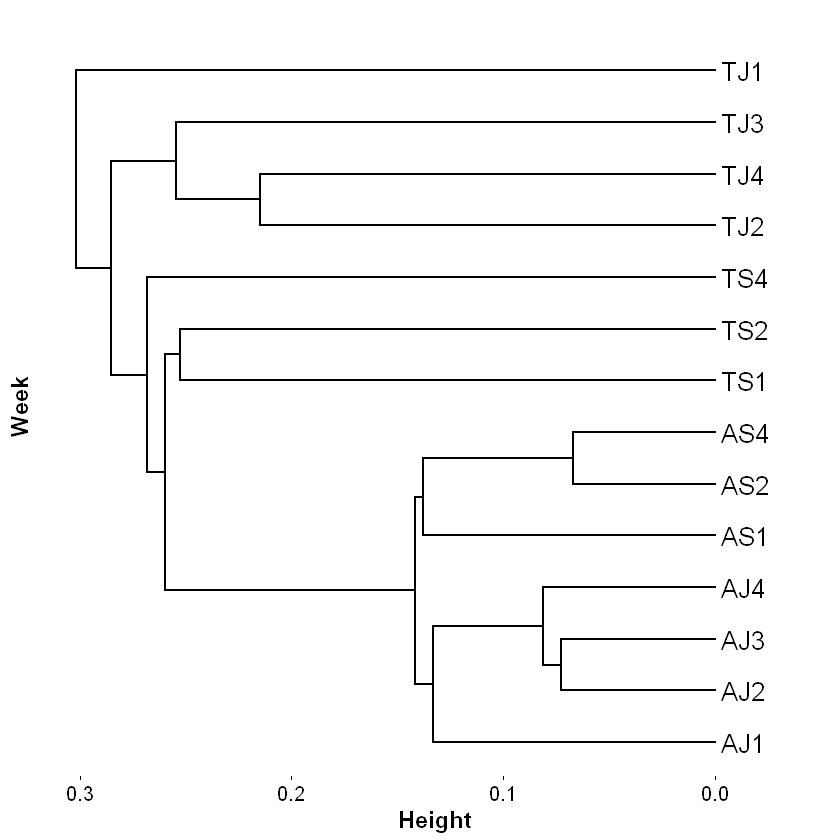

In [55]:
weeks = cbind(alc.df, tob.df)[c(1:6, 8, 9:14, 16)] # remove september days with weird data
colnames(weeks) = c('AJ1', 'AJ2', 'AJ3', 'AJ4', 'AS1', 'AS2','AS4', 'TJ1', 'TJ2', 'TJ3', 'TJ4', 'TS1', 'TS2','TS4')
dist = diss(t(apply(weeks, 2, normalize)), METHOD='EUCL')


par(mar=c(5.1,4.1,4.1,3.1))
a = agnes(dist)
a <- as.dendrogram(a)
pdf('c:/users/tom/documents/research/alc-tob-dend-col.pdf',width=7,height=4,paper='special') 
a %>% set("by_labels_branches_col", value = c('AJ1', 'AJ2', 'AJ3', 'AJ4', 'AS1', 'AS2','AS4')) %>% plot(las=1, horiz=TRUE, cex.lab=1.5, xlab='Height', ylab='Week')

dev.off()

p <- fviz_dend(a,  main='', ylab='Height', xlab='Week',  label_col='black', las=1, horiz=TRUE, cex=1.1) 
p <- p + theme(axis.title=element_text(size=14,face="bold"))
p
pdf('c:/users/tom/documents/research/alc-tob-dend.pdf',width=7,height=4,paper='special') 
p
dev.off()